# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
southeast = pd.read_excel("SoutheastHealth.xlsx", sheet_name = "DRG", skiprows = 4)
southeast.shape

(759, 5)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [2]:
col_list = southeast.columns
for col in col_list:
    uniq = len(southeast[col].unique())
    print(col+":"+str(uniq))

MS-DRG :759
MDC:27
TYPE:2
MS-DRG Title:759
Avg Charge
Per Case:531


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
col_list = southeast.columns
for col in col_list:
    uniq = []
    if (len(southeast[col].unique())==1):
        uniq.append(col)
if not uniq:
    print("There are no redudant columns")
else:
    print(uniq)
    
#The column Type has 2
southeast['TYPE'].unique()

There are no redudant columns


array(['SURG', 'MED'], dtype=object)

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

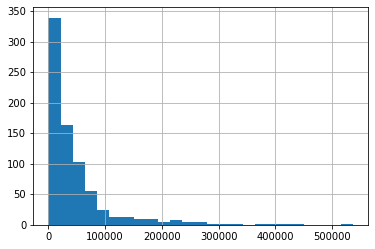

In [4]:
southeast = southeast.rename(columns={'Avg Charge\nPer Case':'Price'})
southeast['Price'] = southeast['Price'].astype(int)
southeast['Price'].hist(bins=25)

## 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [5]:
southeast = southeast[southeast['Price']>0]

In [6]:
delta = pd.read_csv("MODeltaMedical.csv")
delta = delta.drop(delta.index[766:])
bench = delta[['MS-DRG ','MO State Avg Chgs (4% Increase)','MO State Avg Pay (4% Increase)','National Avg Chgs (4% Increase)','National Avg Pay (4% Increase)']].fillna(0).astype(int)
total_df = southeast.merge(bench,how='left',on='MS-DRG ').rename(columns = {'Price':'SE Health Charge','MO State Avg Chgs (4% Increase)':'MO Charge','MO State Avg Pay (4% Increase)':'MO Pay','National Avg Chgs (4% Increase)':'National Charge','National Avg Pay (4% Increase)':'National Pay'})
total_df

,MS-DRG,MDC,TYPE,MS-DRG Title,SE Health Charge,MO Charge,MO Pay,National Charge,National Pay
0,3,PRE,SURG,"ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MO...",536246,514451,141199,681575,158796
1,4,PRE,SURG,"TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NE...",238806,298339,76257,379128,88495
2,23,01,SURG,CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACUTE COM...,120308,163480,38460,210605,47106
3,24,01,SURG,CRANIO W MAJOR DEV IMPL/ACUTE COMPLEX CNS PDX ...,87920,108145,26506,147697,31605
4,25,01,SURG,CRANIOTOMY & ENDOVASCULAR INTRACRANIAL PROCEDU...,150007,128023,31494,170142,37659
...,...,...,...,...,...,...,...,...,...
525,981,,SURG,EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPA...,136743,116920,29396,150256,35028
526,982,,SURG,EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPA...,88154,71574,16916,86304,19843
527,983,,SURG,EXTENSIVE O.R. PROCEDURE UNRELATED TO PRINCIPA...,20876,47115,11310,60784,13964
528,987,,SURG,NON-EXTENSIVE O.R. PROC UNRELATED TO PRINCIPAL...,79306,122802,26461,139851,30076


TYPE
MED     AxesSubplot(0.125,0.125;0.775x0.755)
SURG    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SE Health Charge, dtype: object

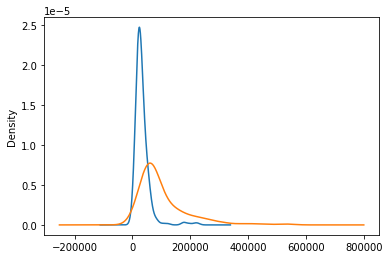

In [7]:
import matplotlib.pyplot as plt
total_df.groupby(['TYPE'])['SE Health Charge'].plot.kde()

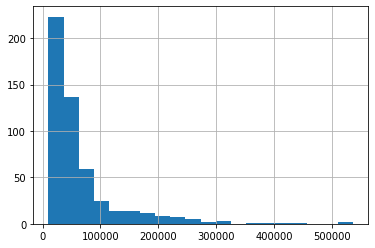

In [8]:
ten_k = total_df[total_df['SE Health Charge']>10000]
ten_k['SE Health Charge'].hist(bins=20)


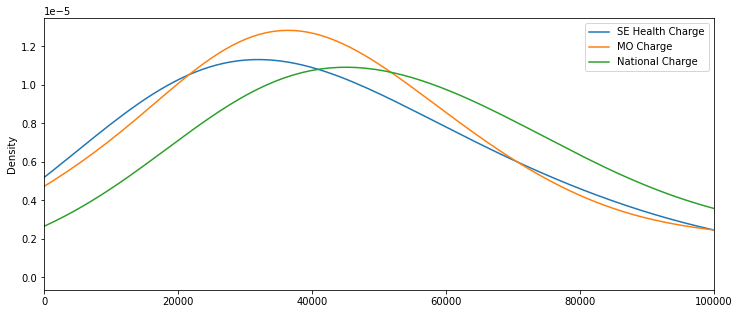

In [9]:
total_df[['SE Health Charge','MO Charge','National Charge']].plot.kde(xlim=(0,100000),figsize=(12,5))

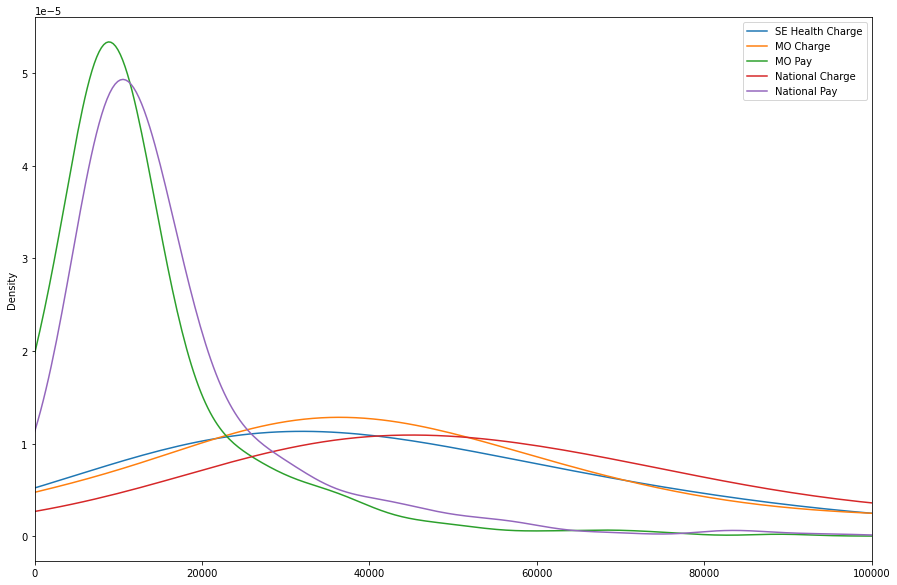

In [10]:
total_df[total_df.columns[4:]].plot.kde(xlim=(0,100000),figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd1838e2e8>,
      dtype=object)

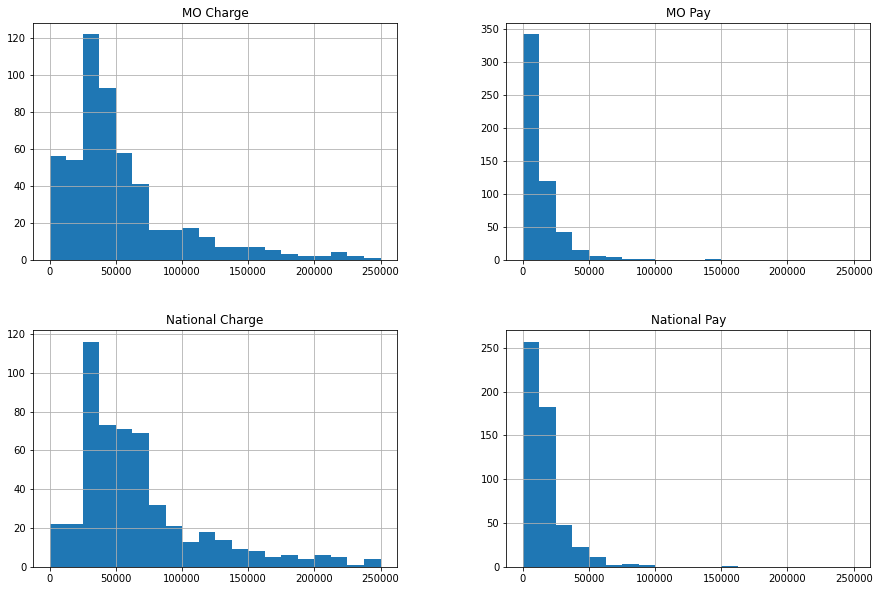

In [11]:
total_df[['MO Charge','MO Pay','National Charge','National Pay']].hist(bins =20, range=[0,250000],figsize =(15,10))

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [12]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [ ]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push


---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.